# 可视化异常处理

对任何一种科学测量方法来说，准确地衡量数据误差都是无比重要的事情，甚至比数据本身还要重要。  
在数据可视化的结果中用图形将误差有效地显示出来，就可以提供更充分的信息。

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## 1. 基本误差线

基本误差线（`errorbar`）可以通过一个 `Matplotlib` 函数来创建。

<ErrorbarContainer object of 3 artists>

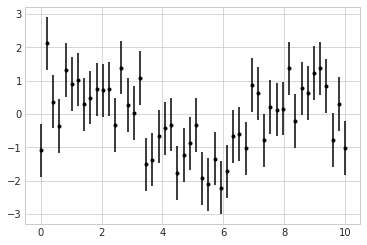

In [2]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k')  # fmt 是一种控制线条和点的外观的代码格式，语法与 plt.plot的缩写代码相同

除了基本选项之外，`errorbar` 还有许多改善结果的选项。通过这些额外的选项，你可以轻松自定义误差线图形的绘画风格。  
我的经验是，让误差线的颜色比数据点的颜色浅一点效果会非常好，尤其是在那些比较密集的图形中。

<ErrorbarContainer object of 3 artists>

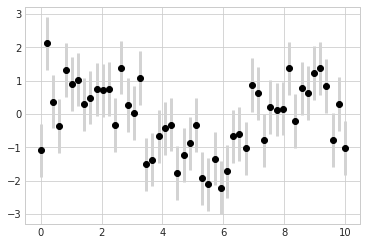

In [3]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)

除了这些选项之外，你还可以设置水平方向的误差线（`xerr`）、单侧误差线（`one-sided errorbar`），以及其他形式的误差线。

## 2. 连续误差

有时候可能需要显示连续变量的误差。虽然 `Matplotlib` 没有内置的简便方法可以解决这个问题，但是通过 `plt.plot` 与 `plt.fill_between` 来解决也不是很难。

我们将用 `Scikit-Learn` 程序库 `API` 里面一个简单的**高斯过程回归方法**（`Gaussian process regression`，`GPR`）来演示。  
这是用一种非常灵活的非参数方程（`nonparametric function`）对带有不确定性的连续测量值进行拟合的方法。  
这里不会详细介绍高斯过程回归方法的具体内容，而是将注意力放在数据可视化上面：

In [4]:
# from sklearn.gaussian_process import GaussianProcess  # cannot import name 'GaussianProcess' from 'sklearn.gaussian_process'
# from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process import GaussianProcessClassifier as GPC

# 定义模型和要画的数据
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# 计算高斯过程拟合结果
# gp = GPC(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1, random_start=100)
gp = GPC(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1, random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)  # 2*sigma~95%置信区间

TypeError: __init__() got an unexpected keyword argument 'corr'

现在，我们获得了 `xfit`、`yfit` 和 `dyfit`，表示数据的连续拟合结果。接着，如上所示将这些数据传入 `plt.errorbar` 函数。  
但是我们并不是真的要为 1000 个数据点画上 1000 条误差线；相反，可以通过在 `plt.fill_between` 函数中设置颜色来表示连续误差线。

NameError: name 'xfit' is not defined

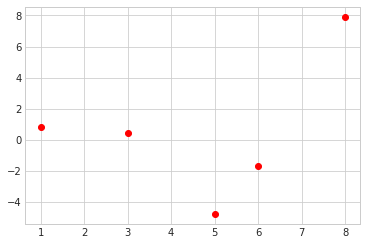

In [5]:
# 将结果可视化
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color='gray', alpha=0.2)
plt.xlim(0, 10);

请注意，我们将 `fill_between` 函数设置为：首先传入 `x` 轴坐标值，然后传入 `y` 轴下边界以及 `y` 轴上边界，这样整个区域就被误差线填充了。  
从结果图形中可以非常直观地看出高斯过程回归方法拟合的效果：在接近样本点的区域，模型受到很强的约束，拟合误差非常小，非常接近真实值；而在远离样本点的区域，模型不受约束，误差不断增大。

最后提一点，如果你觉得这样实现连续误差线的做法太原始，可以参考 4.16 节，我们会在那里介绍 `Seaborn` 程序包，它提供了一个更加简便的 `API` 来实现连续误差线。